In [138]:
import numpy as np
import pandas as pd

In [157]:
train = pd.read_csv('train.csv', delimiter=';')#.dropna().reset_index(drop=True)

<ipython-input-157-6e3ea86c2b02>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv', delimiter=';')#.dropna().reset_index(drop=True)


#**Data Exploration**

In [141]:
# How many purchased again:
train['target90'].value_counts()

print('Percentage of customers who purchased again:', train['target90'].mean())

Percentage of customers who purchased again: 0.1865980017269027


Only around 18.7% of the customers have bought something agian within 90 days. This means we are dealing with an imbalanced classification problem.

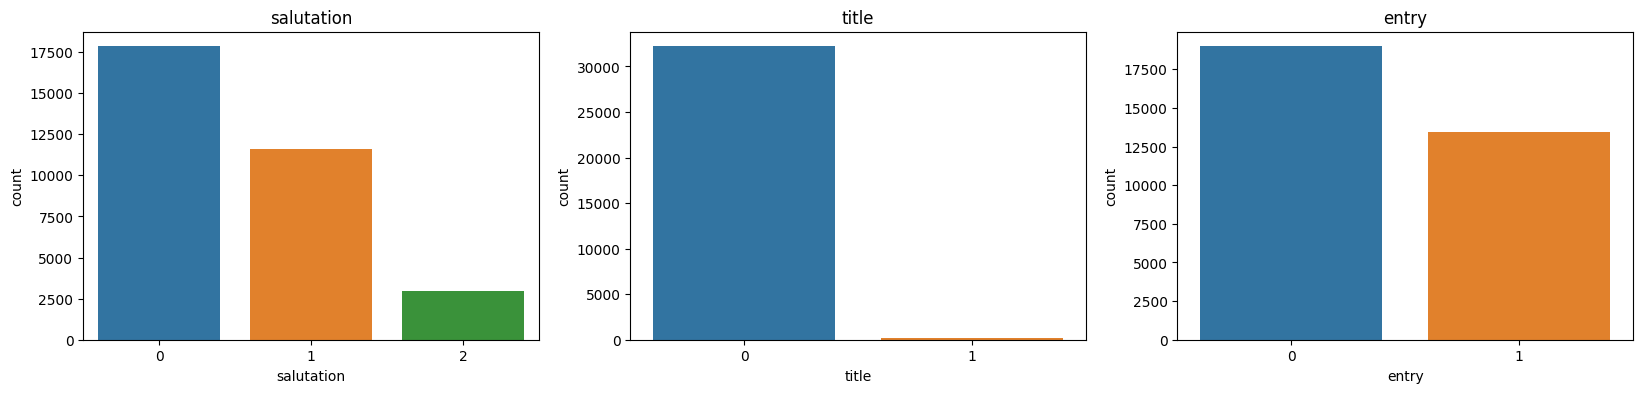

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['salutation','title','entry']
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=train)
    ax.set_title(f"{col}")

**Relationship target90 and other categrocial variables:**

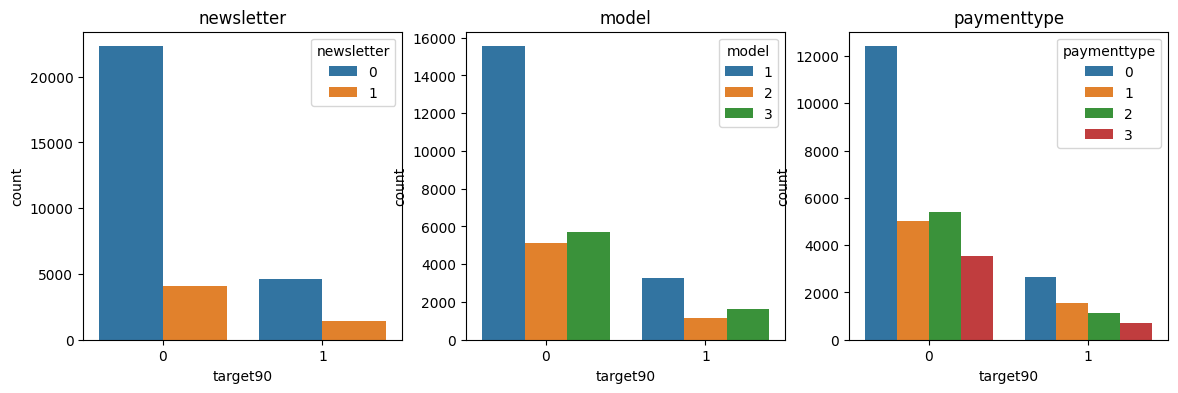

In [144]:
cols1 = ['newsletter', 'model', 'paymenttype']

plt.figure(figsize=(14,4))

for i, col in enumerate(cols1):
    ax = plt.subplot(1, len(cols1), i+1)
    sns.countplot(x = 'target90', hue = str(col), data = train)
    ax.set_title(f"{col}")

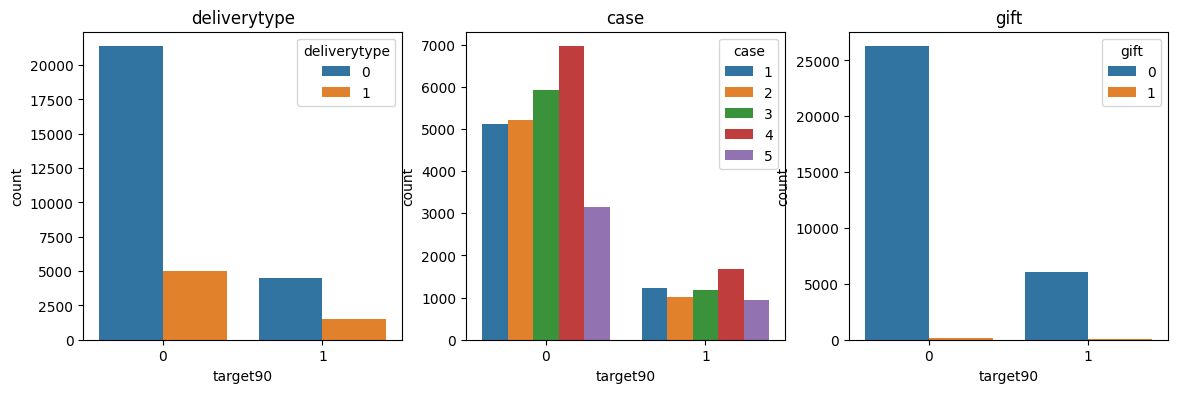

In [145]:
cols2 = ['deliverytype', 'case', 'gift']

plt.figure(figsize=(14,4))

for i, col in enumerate(cols2):
    ax = plt.subplot(1, len(cols2), i+1)
    sns.countplot(x = 'target90', hue = str(col), data = train)
    ax.set_title(f"{col}")

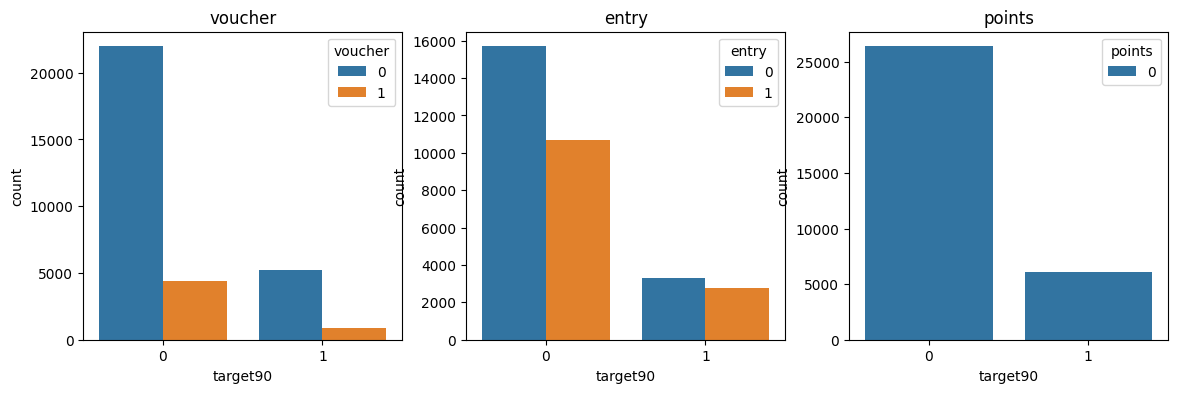

In [191]:
cols3 = ['voucher', 'entry', 'points']

plt.figure(figsize=(14,4))

for i, col in enumerate(cols3):
    ax = plt.subplot(1, len(cols3), i+1)
    sns.countplot(x = 'target90', hue = str(col), data = train)
    ax.set_title(f"{col}")

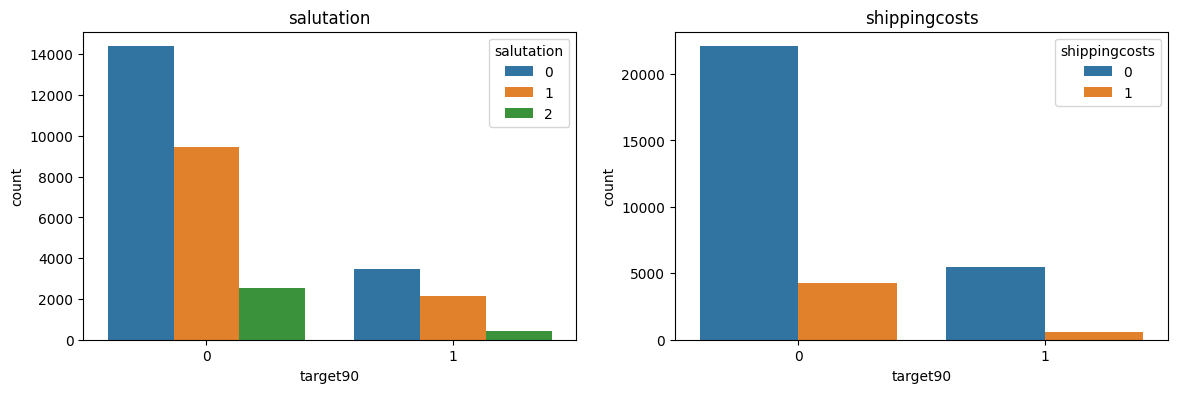

In [192]:
cols4 = ['salutation', 'shippingcosts']

plt.figure(figsize=(14,4))

for i, col in enumerate(cols4):
    ax = plt.subplot(1, len(cols4), i+1)
    sns.countplot(x = 'target90', hue = str(col), data = train)
    ax.set_title(f"{col}")

In [148]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32428 entries, 0 to 32427
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customernumber        32428 non-null  int64 
 1   date                  32428 non-null  object
 2   salutation            32428 non-null  int64 
 3   title                 32428 non-null  int64 
 4   domain                32428 non-null  int64 
 5   datecreated           32428 non-null  object
 6   newsletter            32428 non-null  int64 
 7   model                 32428 non-null  int64 
 8   paymenttype           32428 non-null  int64 
 9   deliverytype          32428 non-null  int64 
 10  invoicepostcode       32428 non-null  int64 
 11  delivpostcode         1392 non-null   object
 12  voucher               32428 non-null  int64 
 13  advertisingdatacode   6523 non-null   object
 14  case                  32428 non-null  int64 
 15  numberitems           32428 non-null

**Label encoding case (ordinal) and one-hot encoding paymenttype (nominal):**

In [158]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

train['case'] = LabelEncoder().fit_transform(train['case'])

onehot_encoder = OneHotEncoder(sparse=False, drop='first')

onehot_encoded = onehot_encoder.fit_transform(train[['paymenttype']]).astype(int)

# Create a new df with one-hot encoded columns
train = pd.concat([train, pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['paymenttype']))], axis=1)

print(train)

       customernumber        date  salutation  title  domain datecreated  \
0               41191  2008-12-01           0      0       9  2008-12-01   
1               38860  2008-12-16           1      0       4  2008-12-16   
2               61917  2008-08-19           0      0      12  2008-08-19   
3               40647  2008-06-16           1      0       8  2008-06-16   
4                1347  2008-08-08           0      0       1  2008-08-08   
...               ...         ...         ...    ...     ...         ...   
32423            7784  2008-10-21           1      0       8  2008-10-21   
32424           41695  2008-11-09           1      0       4  2008-11-09   
32425            7612  2008-04-12           2      0       9  2008-04-12   
32426           31941  2008-11-15           0      0      12  2008-11-15   
32427           58849  2008-07-28           1      0       5  2008-07-28   

       newsletter  model  paymenttype  deliverytype  ...  w5 w6  w7 w8  w9  \
0        

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [252]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32428 entries, 0 to 32427
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customernumber        32428 non-null  int64         
 1   date                  32428 non-null  object        
 2   salutation            32428 non-null  int64         
 3   title                 32428 non-null  int64         
 4   domain                32428 non-null  int64         
 5   datecreated           32428 non-null  object        
 6   newsletter            32428 non-null  int64         
 7   model                 32428 non-null  int64         
 8   paymenttype           32428 non-null  int64         
 9   deliverytype          32428 non-null  int64         
 10  invoicepostcode       32428 non-null  int64         
 11  delivpostcode         1392 non-null   object        
 12  voucher               32428 non-null  int64         
 13  advertisingdatac

#**Delay Variable**

In [159]:
# Convert the date columns to datetime format
NaT_promised = pd.to_datetime(train['deliverydatepromised'], errors='coerce')
NaT_real = pd.to_datetime(train['deliverydatereal'], errors='coerce')



In [160]:
# Filter rows with invalid date formats (NaT values)
inval_idx_promised = train[NaT_promised.isnull()].index.tolist()
inval_idx_real = train[NaT_real.isnull()].index.tolist()


In [161]:
# Display incorrect entries of date as string columns
print("Rows of 'deliverydatepromised' before conversion:")
print(train.loc[inval_idx_promised, 'deliverydatepromised'])

print("\nRows of 'deliverydatereal' before conversion:")
print(train.loc[inval_idx_real, 'deliverydatereal'])

Rows of 'deliverydatepromised' before conversion:
14955    4746-07-23
15657    4746-11-26
16892    4746-06-13
23111    4746-11-15
23538    4746-05-08
23669    4746-05-15
26727    4746-11-15
27202    4746-10-01
28201    4746-11-18
Name: deliverydatepromised, dtype: object

Rows of 'deliverydatereal' before conversion:
3        0000-00-00
15       0000-00-00
28       0000-00-00
29       0000-00-00
31       0000-00-00
            ...    
32397    0000-00-00
32398    0000-00-00
32406    0000-00-00
32410    0000-00-00
32424    0000-00-00
Name: deliverydatereal, Length: 5472, dtype: object


In [162]:
train['deliverydatepromised'] = train['deliverydatepromised'].str.replace('4746', '2008')

In [163]:
print(train.loc[inval_idx_promised, 'deliverydatepromised'])

14955    2008-07-23
15657    2008-11-26
16892    2008-06-13
23111    2008-11-15
23538    2008-05-08
23669    2008-05-15
26727    2008-11-15
27202    2008-10-01
28201    2008-11-18
Name: deliverydatepromised, dtype: object


In [164]:
import numpy as np

train['deliverydatereal'] = train['deliverydatereal'].replace('0000-00-00', np.nan)


In [165]:
print(train['deliverydatepromised'].isna().sum())
print(train['deliverydatereal'].isna().sum())

0
5472


In [166]:
# Convert columns to datetime format
train['deliverydatepromised'] = pd.to_datetime(train['deliverydatepromised'], errors='coerce')
train['deliverydatereal'] = pd.to_datetime(train['deliverydatereal'], errors='coerce')

In [167]:
# Calculate difference between promised and real delivery dates (in days)
train['delivery_diff'] = (train['deliverydatereal'] - train['deliverydatepromised']).dt.days

# Display the df with the new feature
print(train[['deliverydatepromised', 'deliverydatereal', 'delivery_diff']].head(10))


  deliverydatepromised deliverydatereal  delivery_diff
0           2008-12-03       2008-12-02           -1.0
1           2008-12-30       2009-02-03           35.0
2           2008-09-02       2008-08-28           -5.0
3           2008-06-17              NaT            NaN
4           2008-08-11       2008-08-08           -3.0
5           2008-08-12       2008-08-11           -1.0
6           2008-12-23       2008-12-22           -1.0
7           2008-09-05       2008-09-04           -1.0
8           2008-06-26       2008-06-27            1.0
9           2008-08-05       2008-08-04           -1.0


In [168]:
train['delay'] = np.where(train['delivery_diff'] > 0, 1, 0)
train['earlier'] = np.where(train['delivery_diff'] < 0, 1, 0)

In [169]:

train['missing_info'] = train[['delay', 'earlier']].any(axis=1).isnull().astype(int)

# Fill NaNs in 'earlier', 'lated' with a placeholder value, e.g., -1
train[['delay', 'earlier']] = train[['delay','earlier']].fillna(-1)


In [194]:
print(train['delivery_diff'].describe())

count    26956.000000
mean       -17.260276
std         72.324342
min       -369.000000
25%         -3.000000
50%         -1.000000
75%         -1.000000
max        368.000000
Name: delivery_diff, dtype: float64


#**Binary Classification with selected features**

In [255]:
from sklearn.model_selection import train_test_split

dropped = ['customernumber', 'date', 'title', 'domain', 'datecreated',
           'invoicepostcode', 'delivpostcode', 'advertisingdatacode',
           'deliverydatepromised', 'deliverydatereal', 'delivery_diff',
           'target90']

X = train.drop(columns=dropped)
y = train['target90']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    shuffle=True,
                                                    random_state = 13,)

In [256]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32428 entries, 0 to 32427
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   salutation     32428 non-null  int64
 1   newsletter     32428 non-null  int64
 2   model          32428 non-null  int64
 3   paymenttype    32428 non-null  int64
 4   deliverytype   32428 non-null  int64
 5   voucher        32428 non-null  int64
 6   case           32428 non-null  int64
 7   numberitems    32428 non-null  int64
 8   gift           32428 non-null  int64
 9   entry          32428 non-null  int64
 10  points         32428 non-null  int64
 11  shippingcosts  32428 non-null  int64
 12  weight         32428 non-null  int64
 13  remi           32428 non-null  int64
 14  cancel         32428 non-null  int64
 15  used           32428 non-null  int64
 16  w0             32428 non-null  int64
 17  w1             32428 non-null  int64
 18  w2             32428 non-null  int64
 19  w3  

In [257]:
print(train['delay'].mean())

0.058529665720981866


In [258]:
print(train['earlier'].mean())

0.667910447761194


In [259]:
print(train['deliverydatepromised'].describe())
print(train['deliverydatereal'].describe())

count                   32428
unique                    464
top       2008-12-23 00:00:00
freq                      554
first     2008-04-02 00:00:00
last      2010-03-09 00:00:00
Name: deliverydatepromised, dtype: object
count                   26956
unique                    411
top       2008-12-16 00:00:00
freq                      351
first     2008-04-01 00:00:00
last      2009-12-30 00:00:00
Name: deliverydatereal, dtype: object


<ipython-input-259-9007e7a6d1cc>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

<ipython-input-259-9007e7a6d1cc>:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



#**XGBOOST**

In [260]:
print(train['target90'].isna().sum())

0


In [261]:
print(y_train.isna().sum())
print(y_train.info())

0
<class 'pandas.core.series.Series'>
Int64Index: 25942 entries, 14536 to 338
Series name: target90
Non-Null Count  Dtype
--------------  -----
25942 non-null  int64
dtypes: int64(1)
memory usage: 405.3 KB
None


In [262]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [283]:
# Create an XGBoost classifier without any param setting
xgb_classifier = XGBClassifier()

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8117483811285846


In [284]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

In [285]:
print(conf_mat)

[[5230   50]
 [1171   35]]


In [266]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = range(5,11)
n_estimators = range(10,50)
param_dist = {'max_depth': max_depth, 'n_estimators': n_estimators}

xgb = XGBClassifier()
xgb_cv = RandomizedSearchCV(xgb, param_dist, n_jobs=-1, cv=10,verbose=1, n_iter=100, scoring='neg_mean_absolute_error')
xgb_cv.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(5, 11),
                                        'n_estimators': range(10, 50)},
                   scoring='neg_mean_absolute_error', verbose=1)

In [267]:
print('Tuned XGBoost Parameters:',xgb_cv.best_params_)

Tuned XGBoost Parameters: {'n_estimators': 16, 'max_depth': 5}


In [268]:
# Adress imbalance in data by using 'scale_pos_weight' param in xgb:
positive_class_count = sum(y_train == 1)
negative_class_count = sum(y_train == 0)
ratio = negative_class_count / positive_class_count

In [271]:
best_xgb = XGBClassifier(n_estimators=16, max_depth=5, learning_rate=0.0004, scale_pos_weight=ratio, random_state=13)

In [273]:
best_xgb.fit(X_train, y_train)

# Predictions on the test data
y_pred_bestxgb = best_xgb.predict(X_test)

# Evaluate  best xgb model
accuracy = accuracy_score(y_test, y_pred_bestxgb)
print(f"Accuracy: {accuracy}") # much lower accuracy

Accuracy: 0.6133209990749307


In [274]:
conf_mat_bestxgb = confusion_matrix(y_test, y_pred_bestxgb)

In [275]:
print(conf_mat_bestxgb)

[[3368 1912]
 [ 596  610]]


#**Feature Importance**

In [279]:
# Access feature importances
feature_importances = xgb_classifier.feature_importances_

for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")


salutation: 0.025831904262304306
newsletter: 0.06888683140277863
model: 0.030402477830648422
paymenttype: 0.022546311840415
deliverytype: 0.09450972080230713
voucher: 0.04977520927786827
case: 0.02907540276646614
numberitems: 0.02520981803536415
gift: 0.02410384826362133
entry: 0.03521953523159027
points: 0.0
shippingcosts: 0.09015320241451263
weight: 0.03002092055976391
remi: 0.07368925958871841
cancel: 0.02658798359334469
used: 0.028759827837347984
w0: 0.02633165940642357
w1: 0.023782551288604736
w2: 0.02721279487013817
w3: 0.03382693976163864
w4: 0.01850181072950363
w5: 0.03824562206864357
w6: 0.023253848776221275
w7: 0.025656655430793762
w8: 0.0
w9: 0.02663528174161911
w10: 0.02701711095869541
paymenttype_1: 0.0
paymenttype_2: 0.021860742941498756
paymenttype_3: 0.0
delay: 0.021661270409822464
earlier: 0.03124147653579712
missing_info: 0.0


In [280]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

          Feature  Importance
4    deliverytype    0.094510
11  shippingcosts    0.090153
13           remi    0.073689
1      newsletter    0.068887
5         voucher    0.049775
21             w5    0.038246
9           entry    0.035220
19             w3    0.033827
31        earlier    0.031241
2           model    0.030402
12         weight    0.030021
6            case    0.029075
15           used    0.028760
18             w2    0.027213
26            w10    0.027017
25             w9    0.026635
14         cancel    0.026588
16             w0    0.026332
0      salutation    0.025832
23             w7    0.025657
7     numberitems    0.025210
8            gift    0.024104
17             w1    0.023783
22             w6    0.023254
3     paymenttype    0.022546
28  paymenttype_2    0.021861
30          delay    0.021661
20             w4    0.018502
10         points    0.000000
24             w8    0.000000
27  paymenttype_1    0.000000
29  paymenttype_3    0.000000
32   missi

**After fine-tuning:**

In [281]:
# Access feature importances
feature_importances_bestxgb = best_xgb.feature_importances_

for feature, importance in zip(X_train.columns, feature_importances_bestxgb):
    print(f"{feature}: {importance}")


salutation: 0.0
newsletter: 0.3190845549106598
model: 0.020286476239562035
paymenttype: 0.0
deliverytype: 0.09088008105754852
voucher: 0.022165969014167786
case: 0.0
numberitems: 0.012270406819880009
gift: 0.0
entry: 0.026724841445684433
points: 0.0
shippingcosts: 0.27140724658966064
weight: 0.025335749611258507
remi: 0.13649845123291016
cancel: 0.008854846470057964
used: 0.021470563486218452
w0: 0.014738883823156357
w1: 0.0
w2: 0.011808245442807674
w3: 0.0
w4: 0.0
w5: 0.0
w6: 0.0
w7: 0.0
w8: 0.0
w9: 0.009989400394260883
w10: 0.008484302088618279
paymenttype_1: 0.0
paymenttype_2: 0.0
paymenttype_3: 0.0
delay: 0.0
earlier: 0.0
missing_info: 0.0


In [282]:

feature_importance_2 = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_bestxgb})

# Sort in descending order
feature_importance_2 = feature_importance_2.sort_values(by='Importance', ascending=False)
print(feature_importance_2)

          Feature  Importance
1      newsletter    0.319085
11  shippingcosts    0.271407
13           remi    0.136498
4    deliverytype    0.090880
9           entry    0.026725
12         weight    0.025336
5         voucher    0.022166
15           used    0.021471
2           model    0.020286
16             w0    0.014739
7     numberitems    0.012270
18             w2    0.011808
25             w9    0.009989
14         cancel    0.008855
26            w10    0.008484
28  paymenttype_2    0.000000
23             w7    0.000000
29  paymenttype_3    0.000000
30          delay    0.000000
31        earlier    0.000000
27  paymenttype_1    0.000000
24             w8    0.000000
0      salutation    0.000000
22             w6    0.000000
21             w5    0.000000
20             w4    0.000000
19             w3    0.000000
17             w1    0.000000
10         points    0.000000
8            gift    0.000000
6            case    0.000000
3     paymenttype    0.000000
32   missi